# NEW YORK CITY TAXI TRIP DURATION DATA ANALYSIS

The NY City taxi trip dataset is based on the 2016 NYC Yellow Cab trip record data.The analysis of the data is aimed at building a model that predicts the total ride duration of taxi trips in New York City.

In [1]:
#importing all libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#loading the train data set into the pandas dataframe 
train_df=pd.read_csv('train.csv')
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [3]:
#Shape and size of our data
train_df.shape

(1458644, 11)

# DATA FIELDS DESCRIPTION

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor
because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

# DATA MANIPULATION

In [4]:
#returns the first 5 rows of the dataset
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
#returns the last 5 rows of the dataset
train_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
#structure of the data
#datatypes of the columns
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#The columns pickup_datetime and dropoff_datetime are stored as objects must be converted to datetime
#converting the data column datatypes from objects to strings
train_df['pickup_datetime']=train_df['pickup_datetime'].astype('str')
train_df['dropoff_datetime']=train_df['dropoff_datetime'].astype('str')
#converting using pandas.to_datetime()
train_df['pickup_datetime']=pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime']=pd.to_datetime(train_df['dropoff_datetime'])
train_df['pickup-day']=train_df['pickup_datetime'].dt.date
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.date


In [8]:
#the columns pickup_datetime and dropoff_datetime are now converted to datetime format
train_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup-day                    object
dropoff_day                   object
dtype: object

In [9]:
#checking for missing values on the df using the method  .notnull()
train_df.notnull().any()
#No missing values on the train dataframe

id                    True
vendor_id             True
pickup_datetime       True
dropoff_datetime      True
passenger_count       True
pickup_longitude      True
pickup_latitude       True
dropoff_longitude     True
dropoff_latitude      True
store_and_fwd_flag    True
trip_duration         True
pickup-day            True
dropoff_day           True
dtype: bool

AxesSubplot(0.125,0.125;0.775x0.755)


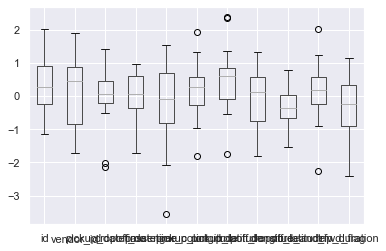

In [10]:
#checking for outliers using (boxplot,normal distribution)
#to see plots in the notebook
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(16,11), columns=['id','vendor_id','pickup_datetime','dropoff_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration'])
boxplot = df.boxplot(column=['id','vendor_id','pickup_datetime','dropoff_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration'])

print(boxplot)

#There is prescence of outliers in column 3,5,6,7,10

# EDA 


In [11]:
#total number of trips
#using the records stored in the id column
print("Total vendors: ",train_df.id.unique().shape[0])

Total vendors:  1458644


In [12]:
#total number of unique vendors
print("Total vendors: ",train_df.vendor_id.unique().shape[0])

Total vendors:  2


In [13]:
pip install haversine

In [40]:
#Derive new field, distance from pickup to dropoff using some python library?
from haversine import haversine
listA = []
for index,row in train_df.iterrows():
    pickup_lat = row['pickup_latitude']
    pickup_long = row['pickup_longitude']
    drop_lat = row['dropoff_latitude']
    drop_long = row['dropoff_longitude']
    res = haversine((pickup_lat,pickup_long),(drop_lat,drop_long))
    listA.append(res)
train_df['trip_distance'] = listA  
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup-day,dropoff_day,trip_distance,pickup_timezone,dropoff_timezone,geometry
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,1.498523,evening,evening,POINT (-73.98215 40.76794)
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,1.805510,mid night,mid night,POINT (-73.98042 40.73856)
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,6.385107,morning,afternoon,POINT (-73.97903 40.76394)
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,1.485500,evening,evening,POINT (-74.01004 40.71997)
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,1.188590,afternoon,afternoon,POINT (-73.97305 40.79321)


In [41]:
#Descriptive stats for trip duration, distance, and passenger count?
train_df[['trip_duration','trip_distance','passenger_count']].describe()

,trip_duration,trip_distance,passenger_count
count,1.458644e+06,1.458644e+06,1.458644e+06
mean,9.594923e+02,3.440869e+00,1.664530e+00
std,5.237432e+03,4.296544e+00,1.314242e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.970000e+02,1.231838e+00,1.000000e+00
50%,6.620000e+02,2.093720e+00,1.000000e+00
75%,1.075000e+03,3.875343e+00,2.000000e+00
max,3.526282e+06,1.240910e+03,9.000000e+00


<AxesSubplot:>

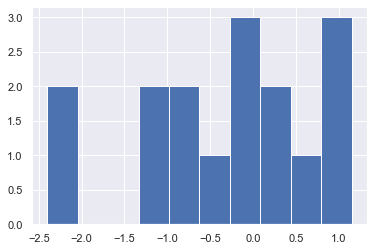

In [37]:
#Histogram with meaningful bins for trip duration, trip_distance, and passenger_count?
#trip_duration bin
df['trip_duration'].hist(bins=10)

<AxesSubplot:>

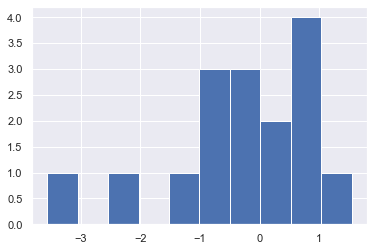

In [42]:
df['passenger_count'].hist(bins=10)

In [43]:
df['trip_distance'].hist(bins=10)

KeyError: 'trip_distance'

In [ ]:
#Create new data frames by grouping bins and getting the count of each bin and then doing a plot(Bar/pie)
#trip duration

In [18]:
#Divide time into early morning, morning, afternoon, evening, night and mid night. Now do a bar and pie chart to see the number of trips in different times?
def get_time_bin(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(8, 0, 0):
        return 'early morning'
    if x>=datetime.time(8, 0, 1) and x <=datetime.time(12, 0, 0):
        return 'morning'
    elif x>=datetime.time(12, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'afternoon'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(20, 0, 0):
        return 'evening'
    elif x>=datetime.time(20, 0, 1) or x <=datetime.time(0, 0, 0):
        return 'night'
    elif x>=datetime.time(0, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'mid night'
    
train_df['pickup_timezone']=train_df['pickup_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
train_df['dropoff_timezone']=train_df['dropoff_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

In [19]:
pip install Shapely

In [20]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.15 in c:\users\leah\anaconda3\lib\site-packages (from matplotlib->descartes) (1.19.1)



In [27]:
#Geo plot using lat and long to understand the distribution of trips
from descartes import PolygonPatch
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(train_df['pickup_longitude'], train_df['pickup_latitude'])]
gdf = GeoDataFrame(train_df, geometry=geometry)   

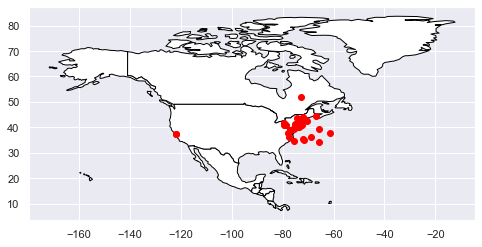

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(8, 8))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

<AxesSubplot:xlabel='trip_distance'>

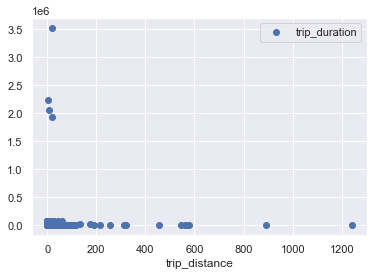

In [23]:
#Scatter plot to understand distance vs duration relation? Stacked bar chart to understand the same but with bins?
train_df.plot(x='trip_distance', y='trip_duration', style='o')

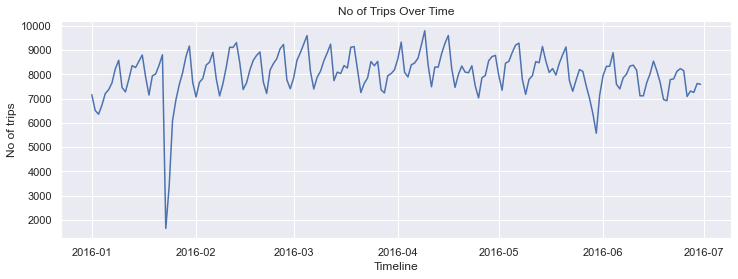

In [24]:
#Line plot to understand daily number of trips, distance travelled and total passengers?
#no of trips
data = train_df.groupby(train_df.pickup_datetime.dt.date).aggregate({'id':['nunique']})
plt.figure(figsize=(12,4))
plt.title('No of Trips Over Time')
plt.ylabel('No of trips') ; plt.xlabel('Timeline')
plt.plot(data)
pass

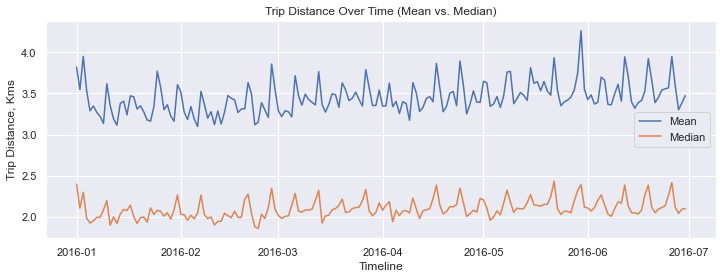

In [25]:
#distance travelled
data = train_df.groupby(train_df.pickup_datetime.dt.date).aggregate({'trip_distance':['mean', 'median']})
plt.figure(figsize=(12,4))
plt.title('Trip Distance Over Time (Mean vs. Median)')
plt.ylabel('Trip Distance, Kms') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

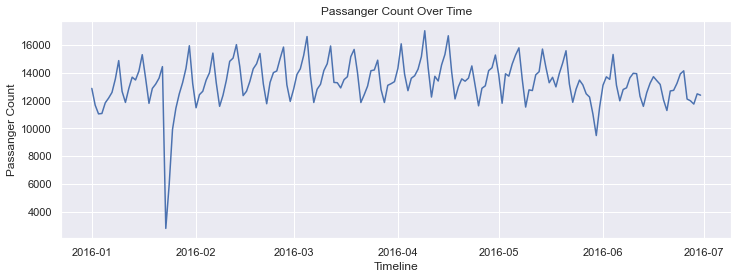

In [26]:
#total passengers
data = train_df.groupby(train_df.pickup_datetime.dt.date).aggregate({'passenger_count':['sum']})
plt.figure(figsize=(12,4))
plt.title('Passanger Count Over Time')
plt.ylabel('Passanger Count') ; plt.xlabel('Timeline')
plt.plot(data)
pass